# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [5]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [74]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

- `dis`: weighted mean of distances to five Boston employment centres.
- `medv`: median value of owner-occupied homes in $1000s.

_(ii)_ What concept ‘defines’ the plotted line?

- The plotted line represents the linear regression.

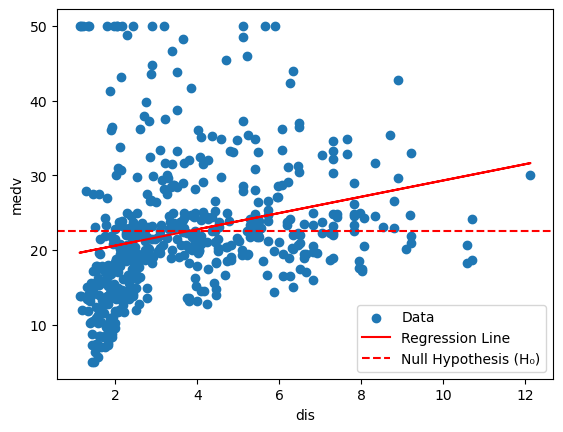

In [75]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

plt.axhline(np.mean(medv), color='red', linestyle='--', label="Null Hypothesis (H₀)")

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

- Null Hypothesis
    - The null hypothesis is when the coefficient of the independent variable is equal to zero (no effect).
    - In multiple linear regression, all coefficients (slopes / Bn) have to be zero.

- Alternative Hypotesis
    - At least one coefficient is not equal to zero (at least one independent variable has an effect on the dependent variable).

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [76]:
# Add your code here

# re-do the extract top have proper labels on summaraize(regression_model) command in the code block below
dis = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'dis': Boston['dis']})

# It sets up the linear regression equation to predict the target variable (y) based on the independent variables (X).
model = sm.OLS(medv, dis) # to specify the Ordinary Least Squares (OLS) regression model
regression_model = model.fit() # to fit the model



Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)? 

- Coefficient Estimate for Intercept / B0 = 18.3901
- Coefficient Estimate for `dis` / B1 = 1.0916
- y = 18.3901 + 1.0916X

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?

- Standard error for Intercept / B0 = 0.817
- Standard error for `dis` / B1 = 0.188

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  

- Confidence Interval for Intercept / B0 : between 16.784179 and 19.995997
- Confidence Interval for `dis` / B1 : between 0.721509 and 1.461717

In [82]:
# Your answer here

print ("Summary", summarize(regression_model))

print ("Confidence Intervals:")
print (regression_model.conf_int())

print (regression_model.summary())


Summary               coef  std err       t  P>|t|
intercept  18.3901    0.817  22.499    0.0
dis         1.0916    0.188   5.795    0.0
Confidence Intervals:
                   0          1
intercept  16.784179  19.995997
dis         0.721509   1.461717
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.21e-08
Time:                        09:06:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrob

c:\Users\klaes\miniconda3\envs\dsi_participant\lib\site-packages\ISLP\models\__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  

- Observing 3 factors:
    - The R-squared = 0.062, therefore, 6.2% of the value is explained by the distance. Since this value is too low it shows the model is not a good fit.
    - F-statistic > 1, therefore, the predictors have a relationship with the response.
    - the p-value of the predictors are zero, therefore they have relationship with the response.

- Conclusion: The results show the predictor `dsi` has a relationship with `medv`, but since R-squared is too low `dsi` alone is not enough, therefore more variables are necessary to have a good model.

_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).

- Yes, I reject the null hypothesis. F-statistic = 33.58, this means that at least one predictor have a relationship with the response.


In [38]:
# Your answer here
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.21e-08
Time:                        09:42:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     18.3901      0.817     22.499      0.000      16.784      19.996
dis            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [90]:
# Add your code here

y = Boston['medv']
X = MS(['rm', 'dis']).fit_transform(Boston)

model1 = sm.OLS(y, X)
results1 = model1.fit()

summarize(results1)
results1.summary()


c:\Users\klaes\miniconda3\envs\dsi_participant\lib\site-packages\ISLP\models\columns.py:159: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
c:\Users\klaes\miniconda3\envs\dsi_participant\lib\site-packages\ISLP\models\__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.84e-75
Time:                        09:33:19   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -34.6361      2.621    -13.212      0.000     -39.786     -29.486
rm             8.8014      0.424     20.780      0.000       7.969       9.634
dis            0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

- The null hypotesis: all coeffitients (b1 and b2) should be zero. (y = b0 + b1X1 + b2X2, where b1 = b2 = 0)
- Alternative hypotheses is that at least one coefficient `coef` is not zero. (y = b0 + b1X1 + b2X2, where b1 <> 0 or b2 <> 0)

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

- Yes, both `dis` and `rm` are predictive. The F-statistic is high, meaninig that both have a relashionship with the responde. Besides their p-value is very low showing that both are predictive of `medv`. 
- The low R-squared shows that more predictors are necessary to improve the model. 

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

- The outliers are the data points too out of the fitted area (black line's area).
- Outliers can represent:
    - A one-of situation like high trafic in downtow for 6 months due to a contruction in the area
    - A seasonal event like high traffic close to Christmas, or,
    - An error on the data i.e typo, wrong measurement, etc.
- It is important to study and understasnd the outliers to evaluate if they should be or not considered in the model, and how to consider.

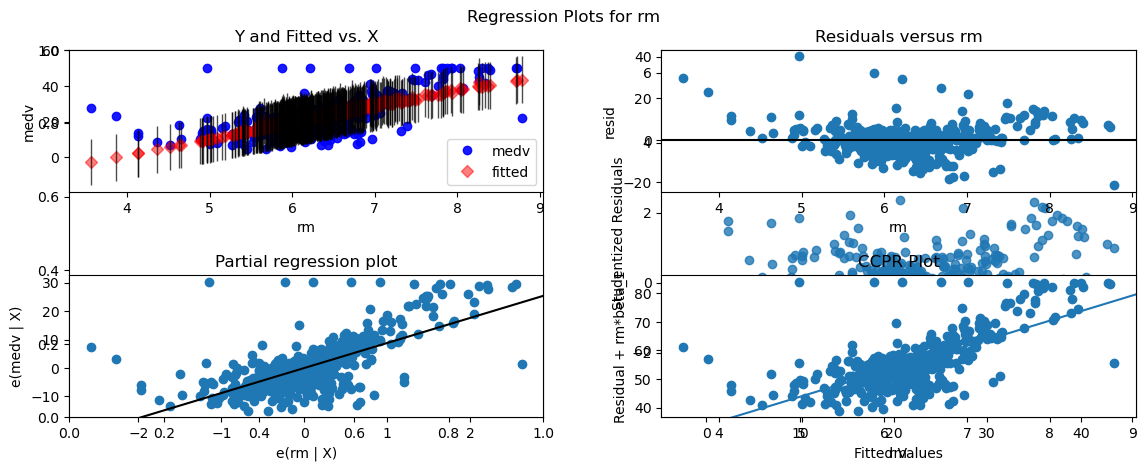

In [91]:
# Add your code here

# Plot the specified diagnostic plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs. Fitted Values Plot
sm.graphics.plot_regress_exog(results1, 'rm', fig=fig)

# Studentized Residuals vs. Fitted Values Plot
ax[1].scatter(results1.fittedvalues, results1.get_influence().resid_studentized_internal, alpha=0.8)
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Studentized Residuals')

plt.show()

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

- The fit below have the interaction between `rm` and `dis` (`rm:dis`).
- The p-value of the interaction `rm:dis` is zero, showing the iteraction has significance for the predictor.


In [99]:
# Add your code here

model_interaction = sm.OLS.from_formula('medv ~ rm + dis + rm:dis', data=Boston)
result_interaction = model_interaction.fit()
print (result_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Fri, 31 May 2024   Prob (F-statistic):           8.37e-79
Time:                        10:03:15   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2533      4.895     -3.116      0.0

In [100]:
model_no_interaction = sm.OLS.from_formula('medv ~ rm + dis', data=Boston)
result_no_interaction = model_no_interaction.fit()
print (result_no_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Fri, 31 May 2024   Prob (F-statistic):           1.84e-75
Time:                        10:04:13   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6361      2.621    -13.212      0.0

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `23:59 PM - 02/06/2024`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X]Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
